We compare the final distribution of simulated paralogs in the bidimensional space defined by transcription and translation rates.

The selected simulation runs are:

*   Minimal model at N = 10^6 -> sigma=0.025 and ratio=4
*   Cost-precision model at N = 10^6 -> sigma=0.025 and ratio=4
*   Minimal model at N = 10^5 -> sigma=0.1 and ratio=4
*   Cost-precision model at N = 10^5 -> sigma=0.1 and ratio=2

In [10]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib import ticker

In [11]:
# Mounting my google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Importing the data

In [12]:
data_model = pd.DataFrame(columns=['Round', 'Couple', 'Bm1', 'Bp1', 'Bm2', 'Bp2',
                                   'Prot1', 'Prot2', 'cv1', 'cv2', 'Exp_cost'])

data_min = data_model.copy()
data_min_1e5 = data_model.copy()
data_cost = data_model.copy()
data_cost_1e5 = data_model.copy()

In [13]:
for iter in [1, 2, 3]:

  df_min = pd.read_csv(f'/content/drive/My Drive/Redaction_SA/Final_figures/Mut_SD_WGD/data_minimal_Bm4_iter{iter}.csv')
  df_min = df_min[df_min['Round'] == df_min['Round'].max()].reset_index(drop=True)
  df_min[['Bm1', 'Bm2', 'Bp1', 'Bp2']] = np.log10(df_min[['Bm1', 'Bm2', 'Bp1', 'Bp2']])
  data_min = pd.concat([data_min, df_min])

  df_min_1e5 = pd.read_csv(f'/content/drive/My Drive/Redaction_SA/Final_figures/Mut_SD_WGD_1e5/data_minimal_Bm4_iter{iter}.csv')
  df_min_1e5 = df_min_1e5[df_min_1e5['Round'] == df_min_1e5['Round'].max()].reset_index(drop=True)
  df_min_1e5[['Bm1', 'Bm2', 'Bp1', 'Bp2']] = np.log10(df_min_1e5[['Bm1', 'Bm2', 'Bp1', 'Bp2']])
  data_min_1e5 = pd.concat([data_min_1e5, df_min_1e5])

  df_cost = pd.read_csv(f'/content/drive/My Drive/Redaction_SA/Final_figures/Mut_SD_WGD/data_Mixed_Bm4_iter{iter}.csv')
  df_cost = df_cost[df_cost['Round'] == df_cost['Round'].max()].reset_index(drop=True)
  df_cost[['Bm1', 'Bm2', 'Bp1', 'Bp2']] = np.log10(df_cost[['Bm1', 'Bm2', 'Bp1', 'Bp2']])
  data_cost = pd.concat([data_cost, df_cost])

  df_cost_1e5 = pd.read_csv(f'/content/drive/My Drive/Redaction_SA/Final_figures/Mut_SD_WGD_1e5/data_Mixed_Bm2_iter{iter}.csv')
  df_cost_1e5 = df_cost_1e5[df_cost_1e5['Round'] == df_cost_1e5['Round'].max()].reset_index(drop=True)
  df_cost_1e5[['Bm1', 'Bm2', 'Bp1', 'Bp2']] = np.log10(df_cost_1e5[['Bm1', 'Bm2', 'Bp1', 'Bp2']])
  data_cost_1e5 = pd.concat([data_cost_1e5, df_cost_1e5])

data_min = data_min.reset_index(drop=True)
data_min_1e5 = data_min_1e5.reset_index(drop=True)
data_cost = data_cost.reset_index(drop=True)
data_cost_1e5 = data_cost_1e5.reset_index(drop=True)

In [14]:
# Paralogs P1 and P2 are combined
min_P1 = data_min[['Bm1', 'Bp1']]
min_P2 = data_min[['Bm2', 'Bp2']]

min_1e5_P1 = data_min_1e5[['Bm1', 'Bp1']]
min_1e5_P2 = data_min_1e5[['Bm2', 'Bp2']]

cost_P1 = data_cost[['Bm1', 'Bp1']]
cost_P2 = data_cost[['Bm2', 'Bp2']]

cost_1e5_P1 = data_cost_1e5[['Bm1', 'Bp1']]
cost_1e5_P2 = data_cost_1e5[['Bm2', 'Bp2']]

for df in [min_P1, min_P2, min_1e5_P1, min_1e5_P2, cost_P1, cost_P2,
           cost_1e5_P1, cost_1e5_P2]:

  df.columns=['Bm', 'Bp']

min_df = pd.concat([min_P1, min_P2]).reset_index(drop=True)
min_1e5_df = pd.concat([min_1e5_P1, min_1e5_P2]).reset_index(drop=True)
cost_df = pd.concat([cost_P1, cost_P2]).reset_index(drop=True)
cost_1e5_df = pd.concat([cost_1e5_P1, cost_1e5_P2]).reset_index(drop=True)

In [15]:
# The empirical distribution of yeast genes is also imported
genes_rates = pd.read_csv('/content/drive/My Drive/Redaction_SA/'
                          'Final_figures/Data_sim_ready/'
                          'rates_Hausser.csv')



In [16]:
genes_rates.columns

Index(['ORF', 'Gene', 'lm', 'lp', 'wRPF', 'wmRNA', 'bmEser', 'amEser', 'bm',
       'm', 'bp', 'cv', 'apExp', 'am', 'isEssential', 'hasTATA', 'YEPDFit',
       'pEst', 'Duplication', 'm_est', 'bm_calc', 'bp_calc', 'pEst_calc'],
      dtype='object')

In [17]:
#genes_rates = genes_rates[genes_rates['Duplication'] == 'WGD']

## 2) Construction of the figure

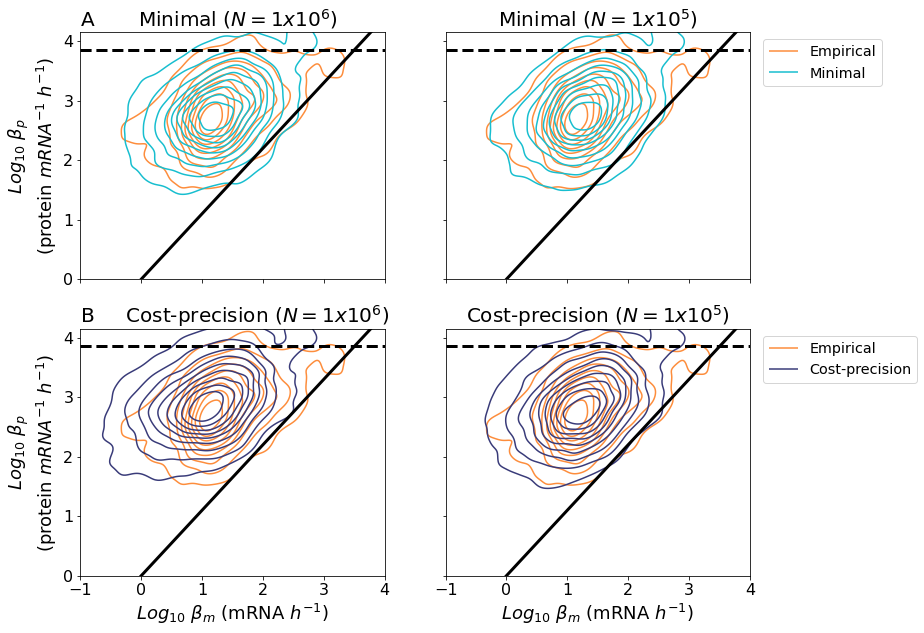

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex='col', sharey='row')

# Adding the empirical distribution
for ax in [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]:
  sns.kdeplot(x='bm', y='bp', data=genes_rates, ax=ax, shade=False, 
              cut=0, color=cm.tab20c.colors[5], label='Empirical')

# Construction of the kdeplots
sns.kdeplot(x='Bm', y='Bp', data=min_df, ax=axs[0,0], shade=False, 
            cut=0, color=cm.tab10.colors[9])
sns.kdeplot(x='Bm', y='Bp', data=min_1e5_df, ax=axs[0,1], shade=False, 
            cut=0, color=cm.tab10.colors[9], label='Minimal')
sns.kdeplot(x='Bm', y='Bp', data=cost_df, ax=axs[1,0], shade=False, 
            cut=0, color=cm.tab20b.colors[0])
sns.kdeplot(x='Bm', y='Bp', data=cost_1e5_df, ax=axs[1,1], shade=False, 
            cut=0, color=cm.tab20b.colors[0], label='Cost-precision')

# Legends
axs[0, 1].legend(loc='upper left', bbox_to_anchor=(1.02, 1),
                 fontsize='x-large')

axs[1, 1].legend(loc='upper left', bbox_to_anchor=(1.02, 1),
                 fontsize='x-large')

# Setting xlims and ylims and adding boundaries
for ax in [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]:
  ax.set_xlim(left=-1, right=4)
  ax.set_ylim(bottom=0, top=4.15)
  ax.axhline(y=np.log10(7.1e3), c='k', linestyle='--', linewidth=3)
  ax.plot([-1, 0, 1, 2, 3, 4], [-1*1.1, 0*1.1, 1*1.1, 2*1.1, 3*1.1, 4*1.1],
          c='k', linewidth=3)
  
# Adding titles
axs[0,0].set_title(r"A       Minimal ($N = 1 x 10^6$)", fontsize=20, loc='left')
axs[0,1].set_title(r"Minimal ($N = 1 x 10^5$)", fontsize=20)
axs[1,0].set_title(r"B     Cost-precision ($N = 1 x 10^6$)", fontsize=20, loc='left')
axs[1,1].set_title(r"Cost-precision ($N = 1 x 10^5$)", fontsize=20)
  

# Labeling of y axes
axs[0,0].set_ylabel(r"$Log_{10}$ $\beta_p$" "\n" r"(protein $mRNA^{-1}$ $h^{-1}$)",
                    fontsize=18)

axs[1,0].set_ylabel(r"$Log_{10}$ $\beta_p$" "\n" r"(protein $mRNA^{-1}$ $h^{-1}$)",
                    fontsize=18)
  
# Labeling of x axes
axs[1,0].set_xlabel(r"$Log_{10}$ $\beta_m$ (mRNA $h^{-1}$)", fontsize=18)
axs[1,1].set_xlabel(r"$Log_{10}$ $\beta_m$ (mRNA $h^{-1}$)", fontsize=18)

# Set the size of all tick labels
for ax in [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]:
  ax.tick_params(labelsize=16)

Fig_supp7 = plt.gcf()
Fig_supp7.savefig('/content/drive/My Drive/Redaction_SA/Final_figures/SuppFig11.pdf', 
                  bbox_inches='tight')
#Fig_supp7.savefig('/content/drive/My Drive/Redaction_SA/Final_figures/SuppFig11_WGD.png', 
                  #bbox_inches='tight')